# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
# in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [3]:
df.gender.value_counts()

M    14000
F    13999
Name: gender, dtype: int64

### Two examples:

In [4]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

In [5]:
df['is_first_letter_vowel'] = [ 'aeiou'.find(name[0])>0 for name in df.name]

In [13]:
df['is_last_letter_aore'] = [ 'ae'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

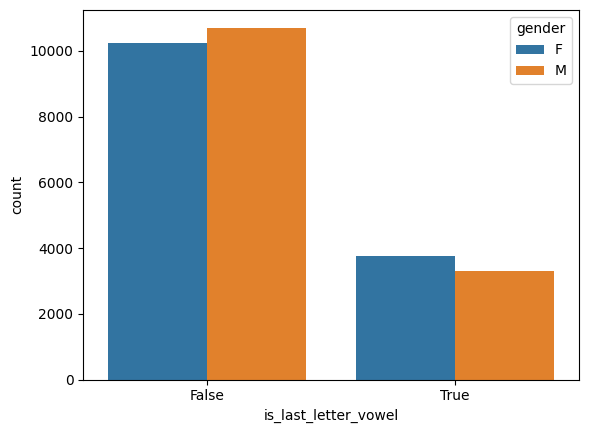

In [7]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

<Axes: xlabel='is_first_letter_vowel', ylabel='count'>

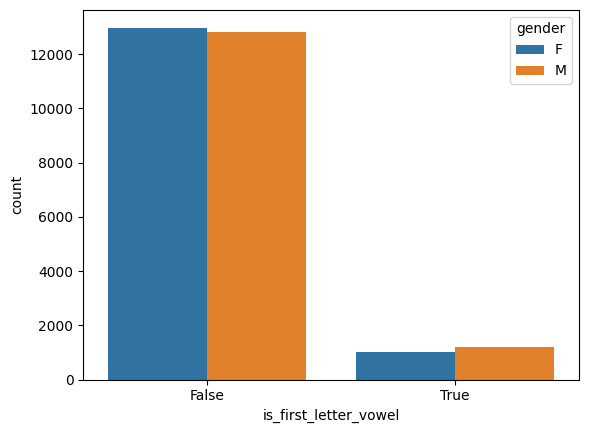

In [8]:
sns.countplot(data = df, x = 'is_first_letter_vowel', hue = 'gender')

<Axes: xlabel='is_last_letter_aore', ylabel='count'>

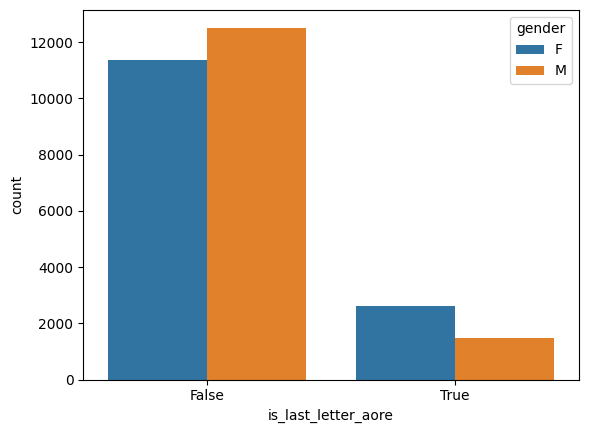

In [15]:
sns.countplot(data = df, x = 'is_last_letter_aore', hue = 'gender')

It looks like last letter is being a vowel and first letter is not a indicator as  for this dataset!

<Axes: xlabel='len', ylabel='count'>

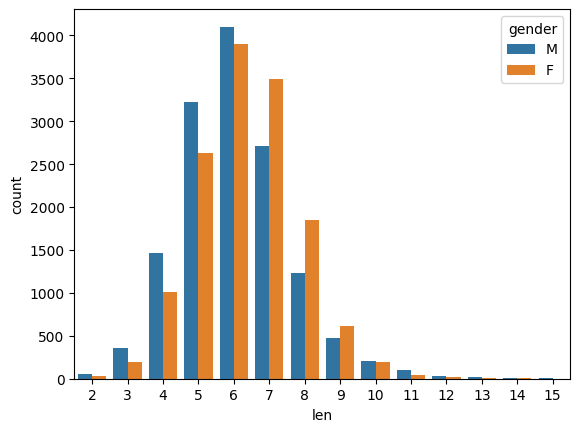

In [ ]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

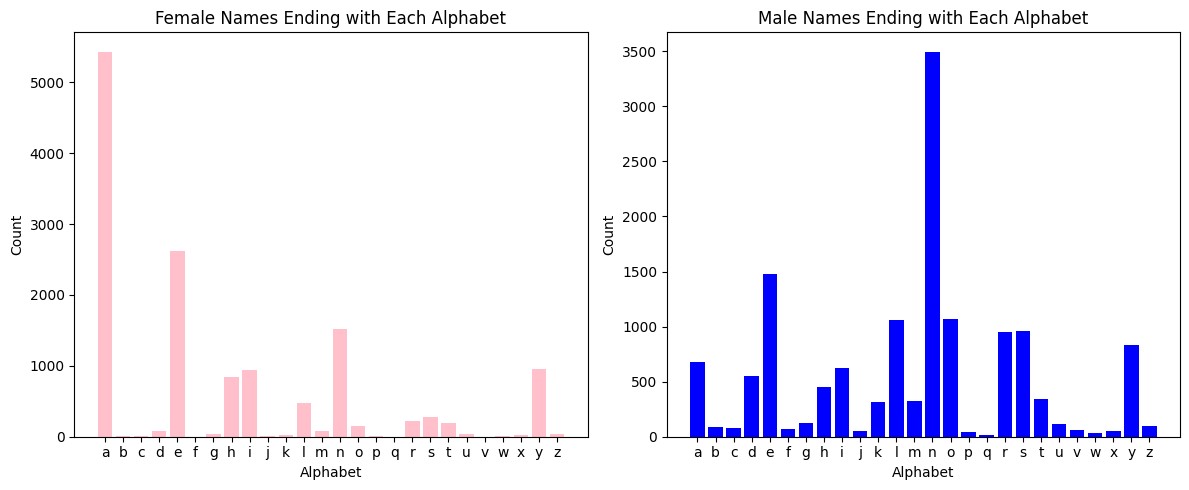

In [28]:
# Function to filter names ending with a specific alphabet for a given gender
def filter_names_ending_with_alphabet(df, alphabet, gender):
    return df[(df['name'].str.endswith(alphabet, na=False)) & (df['gender'] == gender)]

# Plotting names count for each alphabet for each gender
alphabet_counts_female = {}
alphabet_counts_male = {}
for alphabet in 'abcdefghijklmnopqrstuvwxyz':
    filtered_df_female = filter_names_ending_with_alphabet(df, alphabet, 'F')
    filtered_df_male = filter_names_ending_with_alphabet(df, alphabet, 'M')
    alphabet_counts_female[alphabet] = len(filtered_df_female)
    alphabet_counts_male[alphabet] = len(filtered_df_male)

# Creating subplots for each gender
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting counts for female names
axs[0].bar(alphabet_counts_female.keys(), alphabet_counts_female.values(), color='pink')
axs[0].set_title('Female Names Ending with Each Alphabet')
axs[0].set_xlabel('Alphabet')
axs[0].set_ylabel('Count')

# Plotting counts for male names
axs[1].bar(alphabet_counts_male.keys(), alphabet_counts_male.values(), color='blue')
axs[1].set_title('Male Names Ending with Each Alphabet')
axs[1].set_xlabel('Alphabet')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Seems like length doesn't also seem like a good separator

In [33]:
def predict_one(name): # DON'T CHANGE THIS LINE
    # your code
    if name[-1] in 'nolrs':
      return 'M'
    return 'F'

# Examples
print(predict_one('Jane'))
print(predict_one('Michael'))

F
M


In [34]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6745955212686168
